# Project: Movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The 'tmdb-movies' data set contains data of various movies and their respective properties. In this analysis, we'll be investigating the movies database to find out which parameters have a direct impact in the total revenue earned by a movie. To determine this, we will be answering the following questions-
+ Does vote count directly impact the revenue earned by a movie?
+ Are budget and revenue correlated to each other
+ Are the movies released in recent years fetching more revenue?

<br>

Some of the prominent headers that will be used for this analysis are -
+ budget - Info. about the budget of that particular movie (int)
+ revenue - The amount of revenue that was generated by that movie (int)
+ vote_average - The average vote that was awarded to the respective movie (float)
+ release_year - The year in which the movie was released (int)

We'll see more information on other headers through the analysis.

In [1]:
## Importing Pandas and initializing matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

sns.set_style("darkgrid")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

<a id='wrangling'></a>
## Data Wrangling
In this step we will be looking into the various headers/columns in the dataset, their data-types, the number of Null values. We will also be performing data-cleaning to trim the data as per our requirements.

### General Properties

In [2]:
## Loading the dataset into a dataframe and displaying the top 5 rows
main_df = pd.read_csv('tmdb-movies.csv', index_col = ['id'])
main_df.head()

imdb_id  popularity     budget     revenue  \
id                                                     
135397  tt0369610   32.985763  150000000  1513528810   
76341   tt1392190   28.419936  150000000   378436354   
262500  tt2908446   13.112507  110000000   295238201   
140607  tt2488496   11.173104  200000000  2068178225   
168259  tt2820852    9.335014  190000000  1506249360   

                      original_title  \
id                                     
135397                Jurassic World   
76341             Mad Max: Fury Road   
262500                     Insurgent   
140607  Star Wars: The Force Awakens   
168259                     Furious 7   

                                                     cast  \
id                                                          
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
262500  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
168259  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                                 homepage          director  \
id                                                                            
135397                      http://www.jurassicworld.com/   Colin Trevorrow   
76341                         http://www.madmaxmovie.com/     George Miller   
262500     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
140607  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
168259                           http://www.furious7.com/         James Wan   

                              tagline  \
id                                      
135397              The park is open.   
76341              What a Lovely Day.   
262500     One Choice Can Destroy You   
140607  Every generation has a story.   
168259            Vengeance Hits Home   

                                                 keywords  \
id                                                          
135397  monster|dna|tyrannosaurus rex|velociraptor|island   
76341    future|chase|post-apocalyptic|dystopia|australia   
262500  based on novel|revolution|dystopia|sequel|dyst...   
140607              android|spaceship|jedi|space opera|3d   
168259                car race|speed|revenge|suspense|car   

                                                 overview  runtime  \
id                                                                   
135397  Twenty-two years after the events of Jurassic ...      124   
76341   An apocalyptic story set in the furthest reach...      120   
262500  Beatrice Prior must confront her inner demons ...      119   
140607  Thirty years after defeating the Galactic Empi...      136   
168259  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                           genres  \
id                                                  
135397  Action|Adventure|Science Fiction|Thriller   
76341   Action|Adventure|Science Fiction|Thriller   
262500         Adventure|Science Fiction|Thriller   
140607   Action|Adventure|Science Fiction|Fantasy   
168259                      Action|Crime|Thriller   

                                     production_companies release_date  \
id                                                                       
135397  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
76341   Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
262500  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
140607          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
168259  Universal Pictures|Original Film|Media Rights ...       4/1/15   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
id                                                                          
135397        5562           6.5          2015  1.379999e+08  1.392446e+09  
76341         6185       

In [3]:
## Checking the number of rows and columns in the dataset
main_df.shape

(10866, 20)

As we can see, there are 10866 rows and 20 columns in this dataset.<br>Let's dig a little deeper into the dataset and see the arithemetic stats of various columns.

In [4]:
## Using the describe method to display various stats of the columns
main_df.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10866.000000  1.086600e+04  1.086600e+04  10866.000000  10866.000000   
mean       0.646441  1.462570e+07  3.982332e+07    102.070863    217.389748   
std        1.000185  3.091321e+07  1.170035e+08     31.381405    575.619058   
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.207583  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.383856  0.000000e+00  0.000000e+00     99.000000     38.000000   
75%        0.713817  1.500000e+07  2.400000e+07    111.000000    145.750000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean       5.974922   2001.322658  1.755104e+07  5.136436e+07  
std        0.935142     12.812941  3.430616e+07  1.446325e+08  
min        1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%        5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%        6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%        6.600000   2011.000000  2.085325e+07  3.369710e+07  
max        9.200000   2015.000000  4.250000e+08  2.827124e+09

Now that we have seen the overall stats, we do see some anomalities; eg - the min, 25th and 50th percentile of the budget and revenue columns are 0. This is definitely an error; the most probable answer to this problem is that there might be a lot of records with their values set to 0.<br>Let's check if this is true.

In [5]:
main_df[main_df['revenue'] == 0]['revenue'].count(), main_df[main_df['budget'] == 0]['budget'].count() 

(6016, 5696)

As we can see, there are 6016 rows with reveue set to 0 and 5696 rows with their budget set to 0. This needs to be fixed, which will be done once we drop the irrelevant columns and do a little more analysis.

>We could use the fillna() method if the value was NA or replace 0 with the average value, however, either of the cases would lead to heavy modification to the dataset and thus, the integrity would not remain the same.

In [6]:
## Using the info method to find the number of Null values
## Please note 0, will not be treated as a Null value
main_df.info()

## The data type of the columns seems correct.
## Thus, I'm not going to make any changes there.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

### Data Cleaning
In this section, I'll be cleaning the dataset and making sure that only the columns relevant to this analysis (and some extras) are retained, all the other extraneous columns are removed.

In [7]:
## Dropping all the columns which are irrelevant to the analysis I will be doing
main_df.drop(['imdb_id','cast','vote_count','keywords','director','genres','homepage','tagline','release_date','production_companies','budget_adj','revenue_adj', 'overview', 'cast', 'release_date'], axis=1, inplace=True)
main_df.head()

popularity     budget     revenue                original_title  \
id                                                                        
135397   32.985763  150000000  1513528810                Jurassic World   
76341    28.419936  150000000   378436354            Mad Max: Fury Road   
262500   13.112507  110000000   295238201                     Insurgent   
140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
168259    9.335014  190000000  1506249360                     Furious 7   

        runtime  vote_average  release_year  
id                                           
135397      124           6.5          2015  
76341       120           7.1          2015  
262500      119           6.3          2015  
140607      136           7.5          2015  
168259      137           7.3          2015

In [8]:
## Overall numbers to check the consistency of data.
main_df.info()
## Number of Non-Null values in each column of the dataset seems more normalized now.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 7 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 679.1+ KB


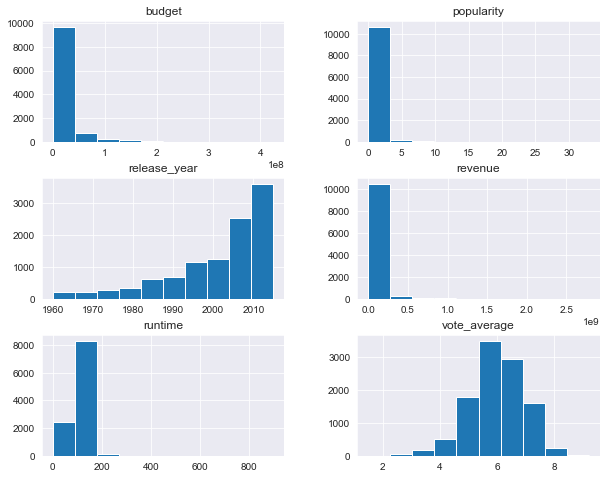

In [9]:
## Checking out the histogram of the dataset
main_df.hist(figsize=(10,8));

In the above histograms, vote_average, runtime and release_year seems to be quite normal. However, budget, revenue and popularity seem to be unevenly skewed to the right. This may be due to the fact that there are a lot of records with revenue and budget set to 0, thus there is a congestion. Let's clean the dataset even more. 

In [10]:
## Removing all the records with revenue/budget set to 0
## This is done since such records will not be helpful in any way for this analysis
df = main_df[main_df['budget'] != 0]
df = df[df['revenue'] != 0]
df.head()

popularity     budget     revenue                original_title  \
id                                                                        
135397   32.985763  150000000  1513528810                Jurassic World   
76341    28.419936  150000000   378436354            Mad Max: Fury Road   
262500   13.112507  110000000   295238201                     Insurgent   
140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
168259    9.335014  190000000  1506249360                     Furious 7   

        runtime  vote_average  release_year  
id                                           
135397      124           6.5          2015  
76341       120           7.1          2015  
262500      119           6.3          2015  
140607      136           7.5          2015  
168259      137           7.3          2015

In [11]:
## Updated stats
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 135397 to 2161
Data columns (total 7 columns):
popularity        3855 non-null float64
budget            3855 non-null int64
revenue           3855 non-null int64
original_title    3855 non-null object
runtime           3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 240.9+ KB


In [12]:
df.describe()

popularity        budget       revenue      runtime  vote_average  \
count  3855.000000  3.855000e+03  3.855000e+03  3855.000000    3855.00000   
mean      1.191400  3.720183e+07  1.076589e+08   109.215824       6.16786   
std       1.475002  4.220291e+07  1.765248e+08    19.922166       0.79504   
min       0.001117  1.000000e+00  2.000000e+00    15.000000       2.20000   
25%       0.462448  1.000000e+07  1.357645e+07    95.000000       5.70000   
50%       0.797298  2.400000e+07  4.479322e+07   106.000000       6.20000   
75%       1.368245  5.000000e+07  1.241530e+08   119.000000       6.70000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000       8.40000   

       release_year  
count   3855.000000  
mean    2001.263294  
std       11.281989  
min     1960.000000  
25%     1995.000000  
50%     2004.000000  
75%     2010.000000  
max     2015.000000

The overall stats of the dataset looks more consistent and inline now.

In [13]:
## Just to make sure, none of the records have NA values
df.dropna(axis = 0, inplace=True);
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 135397 to 2161
Data columns (total 7 columns):
popularity        3855 non-null float64
budget            3855 non-null int64
revenue           3855 non-null int64
original_title    3855 non-null object
runtime           3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 240.9+ KB


The dataset is quite clean and consistent, and should produce accurate results and visualizations.

In [14]:
df.describe()

popularity        budget       revenue      runtime  vote_average  \
count  3855.000000  3.855000e+03  3.855000e+03  3855.000000    3855.00000   
mean      1.191400  3.720183e+07  1.076589e+08   109.215824       6.16786   
std       1.475002  4.220291e+07  1.765248e+08    19.922166       0.79504   
min       0.001117  1.000000e+00  2.000000e+00    15.000000       2.20000   
25%       0.462448  1.000000e+07  1.357645e+07    95.000000       5.70000   
50%       0.797298  2.400000e+07  4.479322e+07   106.000000       6.20000   
75%       1.368245  5.000000e+07  1.241530e+08   119.000000       6.70000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000       8.40000   

       release_year  
count   3855.000000  
mean    2001.263294  
std       11.281989  
min     1960.000000  
25%     1995.000000  
50%     2004.000000  
75%     2010.000000  
max     2015.000000

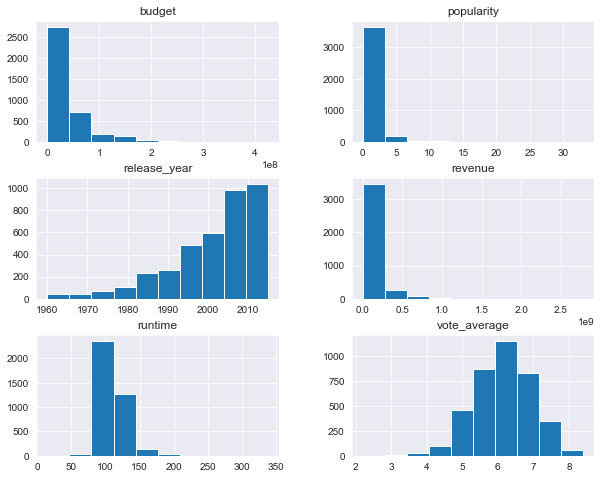

In [15]:
df.hist(figsize = (10,8));

Histograms of budget and revenue got better in terms of distribution of data. However, popularity did not; not considerably at least. This may be the general tendency, a lot of people would not have a positive opinion of a particular movie.<br>All in all, the histograms show that there are a lot of movies with low revenue, popularity and budget, since the plots are extremely skewed towards right.
#### Overall comparison between the budget column of the previous and the cleaned dataset.
You can see that not a lot has changed. The distribution of the dataset as a whole is similar before and after cleaning. However, a lot of records which would not help us in this analysis were removed. Thus, the distribution in the clean dataset is more obvious and normal.

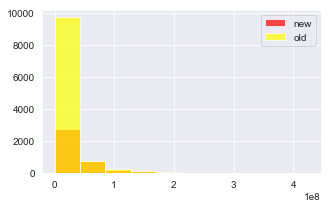

In [34]:
new = df['budget']
old = main_df['budget']
plot = new.hist(figsize=(5,3), alpha=0.7, color='red', label='new');
old.hist(figsize=(5,3), alpha=0.7, color='yellow', label='old');
plt.legend();
## Yellow portion of the dataset has been dropped

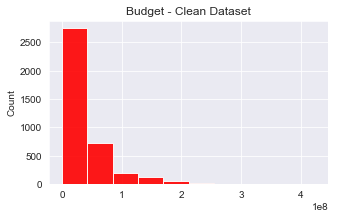

In [40]:
new.hist(figsize=(5,3), alpha=0.9, color='red').set_ylabel('Count');
plt.title('Budget - Clean Dataset');

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Does vote count directly impact the revenue earned by a movie?

For this question, the vote_average and the revenue columns will be inspected. Let's check out the vote_average column.

In [19]:
df['vote_average'].head(10)

id
135397    6.5
76341     7.1
262500    6.3
140607    7.5
168259    7.3
281957    7.2
87101     5.8
286217    7.6
211672    6.5
150540    8.0
Name: vote_average, dtype: float64

As expected, there are a lot of unique values. Thus we need to use binning to segregate the movies into grade. We will be using the following buckets -
+ 0 - 2.5 = low
+ 2.5 - 5 = good
+ 5 - 7.5 = high
+ 7.5 - 10 = brilliant

In [41]:
bins = [0, 2.5, 5, 7.5, 10]
grade_name = ['low', 'good', 'high', 'brilliant']
df['grade'] = pd.cut(df['vote_average'], bins, labels=grade_name)
df.head()

popularity     budget     revenue                original_title  \
id                                                                        
135397   32.985763  150000000  1513528810                Jurassic World   
76341    28.419936  150000000   378436354            Mad Max: Fury Road   
262500   13.112507  110000000   295238201                     Insurgent   
140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
168259    9.335014  190000000  1506249360                     Furious 7   

        runtime  vote_average  release_year        ROI grade revenue_bucket  
id                                                                           
135397      124           6.5          2015  10.090192  high          vhigh  
76341       120           7.1          2015   2.522909  high          vhigh  
262500      119           6.3          2015   2.683984  high          vhigh  
140607      136           7.5          2015  10.340891  high          vhigh  
168259      137           7.3          2015   7.927628  high          vhigh

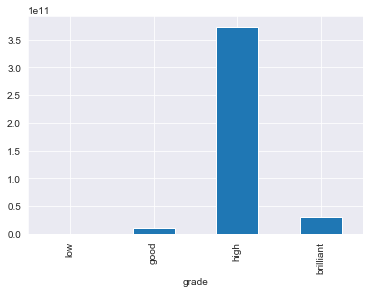

In [21]:
df.groupby('grade')['revenue'].sum().plot(kind = 'bar');

The graph shows that the highest revenue is summed up in the high category. However, isnt the brilliant category supposed to be the highest earning category? I wonder. Let's find out whether this hypothesis of ours is accurate or not.<br><br>
This might be because the number of movies in the high category is much more than that in any other categories.

In [22]:
df.groupby('grade')['popularity'].count()

grade
low             1
good          304
high         3420
brilliant     130
Name: popularity, dtype: int64

As you can see, the number of movies in high category far exceeds the ones in the low and brilliant categories.<br>This issue can be resolved if we visualize the average revenue earning of each bin.

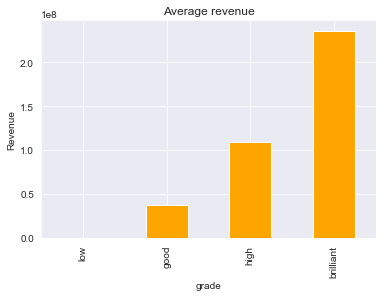

In [23]:
group_sum = df.groupby('grade')['revenue'].sum()
group_count = df.groupby('grade')['revenue'].count()
(group_sum/group_count).plot(kind='bar', color='orange', title='Average revenue').set_ylabel('Revenue');

Thus, the Average revenue plot clearly shows that movies better vote, fetch higher revenue.

<br><br>
### Research Question 2 - Are budget and revenue correlated to each other?

Let us assume the following hypothesis- movies with low budget are bound to have higher revenue. That is, movies with higher budget have a higher ROI.
<br>We will be using two columns here, revenue and budget. We will be working with a derieved column- ROI, which is revenue divided by the budget of that movie.<br><br>
Let's first start with a simple scatterplot and see if we can deduce any outcomes from it.

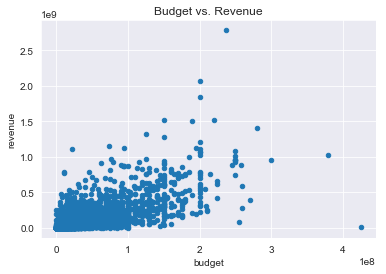

In [24]:
df.plot(x='budget', y='revenue', title='Budget vs. Revenue', kind='scatter');

As we can see, there is a lot of data here. We cannot conclude whether the two attributes are in correlation or not. For this, we can filter out the excess data. The entire dataset can be divided into two sections -
1. movies with budget <= 100000000 and
2. movies with budget > 100000000
Let's look into each section and check if we can get a better picture.

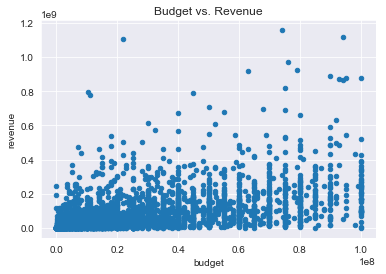

In [25]:
df[df['budget'] <= 1e+08].plot(x='budget', y='revenue', title='Budget vs. Revenue', kind='scatter');

We cannot conclude anything from this view. Let's try the other section of the dataset, which is less populated.

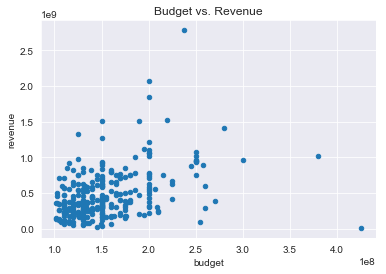

In [26]:
df[df['budget'] > 1e+08].plot(x='budget', y='revenue', title='Budget vs. Revenue', kind='scatter');

As we can see, there is a slight correlation which is visible. But it's not clear; we cannot deduce anything from this view either.<br>
Now, let's try dividing the dataset into bins. We will divide the dataset on the basis of revenue in the following 4 categories (revenue range is mentioned below)-
+ low = 0 - 1.3e+7
+ med = 1.3e+7 - 4.4e+7
+ high = 4.4e+7 - 1.2e+8
+ vhigh = 1.2e+8 - 3e+9

In [27]:
df['revenue'].describe()

count    3.855000e+03
mean     1.076589e+08
std      1.765248e+08
min      2.000000e+00
25%      1.357645e+07
50%      4.479322e+07
75%      1.241530e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [28]:
revenue_bins = [0, 1.3e+7, 4.4e+7, 1.2e+8, 3e+9]
r_grade = ['low', 'med', 'high', 'vhigh']
df['revenue_bucket'] = pd.cut(df['revenue'], revenue_bins, labels=r_grade)

df.head()

popularity     budget     revenue                original_title  \
id                                                                        
135397   32.985763  150000000  1513528810                Jurassic World   
76341    28.419936  150000000   378436354            Mad Max: Fury Road   
262500   13.112507  110000000   295238201                     Insurgent   
140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
168259    9.335014  190000000  1506249360                     Furious 7   

        runtime  vote_average  release_year        ROI grade revenue_bucket  
id                                                                           
135397      124           6.5          2015  10.090192  high          vhigh  
76341       120           7.1          2015   2.522909  high          vhigh  
262500      119           6.3          2015   2.683984  high          vhigh  
140607      136           7.5          2015  10.340891  high          vhigh  
168259      137           7.3          2015   7.927628  high          vhigh

Since we will be working only with budget, revenue and the revenue_bucket; let's create a view of the data with only these columns and do some aggregation to get a crisp dataset.

In [29]:
view = df[['budget','revenue','revenue_bucket']]
view.head()

budget     revenue revenue_bucket
id                                          
135397  150000000  1513528810          vhigh
76341   150000000   378436354          vhigh
262500  110000000   295238201          vhigh
140607  200000000  2068178225          vhigh
168259  190000000  1506249360          vhigh

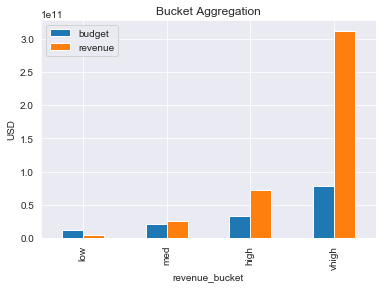

In [30]:
view.groupby('revenue_bucket').sum().plot(kind='bar', title='Bucket Aggregation').set_ylabel('USD');

This graph itself gives us a good idea that budget and revenue are correlated to each other since we see that apart from the low revenue_bucket, all the other bins show an increae in revenue when the budget is comparatively more and a lower revenue, when the budget is less.<br><br>
Nonetheless, we will plot the ROI to get a concrete visualization.

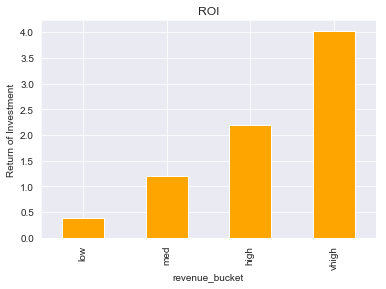

In [31]:
v_revenue = view.groupby('revenue_bucket')['revenue'].sum()
v_budget = view.groupby('revenue_bucket')['budget'].sum()

(v_revenue/v_budget).plot(kind='bar', title='ROI', color = 'orange').set_ylabel('Return of Investment');

This gives a crisp view to the entire dataset in hand and tells us that our hypothesis wasa wrong. Since, the aggregate values clearly show that the RoI is more when the budget is higher and less when the budget is low.

<br><br>
### Research Question 3 - Are the movies released in recent years fetching more revenue?

For this section, we will be looking into the relase year of the movie and the revenue that it has earned. I will start the analysis by binning the dataset into decades starting from 1965-2015 (I chose 1965 as the starting year to simplify the bins, i.e. at an interval of 10 years).

In [71]:
year_bins = [1965, 1975, 1985, 1995, 2005, 2015]
year_labels = ['1965-75', '1975-85', '1985-95', '1995-05', '2005-15']
df['release_decade'] = pd.cut(df['release_year'], year_bins, labels=year_labels)

year_view = df.dropna()
year_view.head()

popularity     budget     revenue                original_title  \
id                                                                        
135397   32.985763  150000000  1513528810                Jurassic World   
76341    28.419936  150000000   378436354            Mad Max: Fury Road   
262500   13.112507  110000000   295238201                     Insurgent   
140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
168259    9.335014  190000000  1506249360                     Furious 7   

        runtime  vote_average  release_year        ROI grade revenue_bucket  \
id                                                                            
135397      124           6.5          2015  10.090192  high          vhigh   
76341       120           7.1          2015   2.522909  high          vhigh   
262500      119           6.3          2015   2.683984  high          vhigh   
140607      136           7.5          2015  10.340891  high          vhigh   
168259      137           7.3          2015   7.927628  high          vhigh   

       release_category release_decade  
id                                      
135397          2005-15        2005-15  
76341           2005-15        2005-15  
262500          2005-15        2005-15  
140607          2005-15        2005-15  
168259          2005-15        2005-15

Let's look at some summary statistics to make sure everything is fine and consistent.

In [78]:
year_view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 135397 to 2161
Data columns (total 12 columns):
popularity          3815 non-null float64
budget              3815 non-null int64
revenue             3815 non-null int64
original_title      3815 non-null object
runtime             3815 non-null int64
vote_average        3815 non-null float64
release_year        3815 non-null int64
ROI                 3815 non-null float64
grade               3815 non-null category
revenue_bucket      3815 non-null category
release_category    3815 non-null category
release_decade      3815 non-null category
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 283.9+ KB


In [79]:
year_view.describe()

popularity        budget       revenue      runtime  vote_average  \
count  3815.000000  3.815000e+03  3.815000e+03  3815.000000   3815.000000   
mean      1.192739  3.752564e+07  1.083588e+08   108.898296      6.160813   
std       1.480050  4.229908e+07  1.772403e+08    19.397685      0.793767   
min       0.001117  1.000000e+00  2.000000e+00    15.000000      2.200000   
25%       0.462839  1.000000e+07  1.382484e+07    95.000000      5.600000   
50%       0.797231  2.450000e+07  4.530000e+07   105.000000      6.200000   
75%       1.368245  5.000000e+07  1.250639e+08   119.000000      6.700000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000      8.400000   

       release_year           ROI  
count   3815.000000  3.815000e+03  
mean    2001.671035  3.009868e+02  
std       10.609631  1.652638e+04  
min     1966.000000  2.400000e-07  
25%     1996.000000  8.709864e-01  
50%     2004.000000  2.102612e+00  
75%     2010.000000  4.172678e+00  
max     2015.000000  1.018619e+06

The dataset seems consistent and ready to use. Let's see the aggregate stats in terms of revenue.

In [84]:
year_view.groupby('release_decade')['revenue'].describe()

count          mean           std       min          25%  \
release_decade                                                              
1965-75           97.0  5.521800e+07  7.512202e+07  638641.0  12000000.00   
1975-85          260.0  6.436200e+07  1.028072e+08      11.0  15721919.75   
1985-95          573.0  8.338567e+07  1.232671e+08       2.0  11390479.00   
1995-05         1169.0  1.066277e+08  1.530632e+08       2.0  17300889.00   
2005-15         1716.0  1.275471e+08  2.142294e+08       3.0  11119311.25   

                       50%           75%           max  
release_decade                                          
1965-75         32056467.0  7.966665e+07  4.706540e+08  
1975-85         30610281.0  6.909394e+07  7.929106e+08  
1985-95         34670720.0  1.120063e+08  1.106280e+09  
1995-05         55494066.0  1.303589e+08  1.845034e+09  
2005-15         50264240.0  1.478055e+08  2.781506e+09

As we can see, both the number of movies and the total revenue earned by them, is steadily increasing decade after decade. Thus, we can conclude that the movie industry is increasing, decade after decade- which implies that there are more number of movies releaseing every decade and fetching more revenue.
<br>However, this can be cause even with the sheer increase in the number of movies being released each decade. Below, we will plot the average revenue earned by all the movies in each decade.

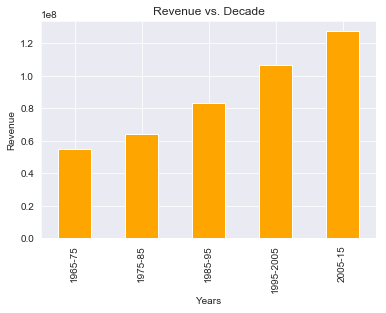

In [69]:
total_revenue = year_view.groupby('release_decade')['revenue'].sum()
total_count = year_view.groupby('release_decade')['revenue'].count()
(total_revenue/total_count).plot(kind='bar', color='orange',title='Revenue vs. Decade');
plt.xlabel('Years');
plt.ylabel('Revenue');

Thus, we can clearly see that the statement we made earlier, saying that the movie industry is increasing decade after decade is increasing and thus, the movies that have been released recently are fetching more revenue on an average than the ones that have released decades ago.

<a id='conclusions'></a>
## Conclusions
In this analysis we found out that the average vote count of the movie is directly proportional to it's revenue. That is, higher the average vote count, more the revenue earned by the movie.<br>
Moreover, budget helps a movie earn higher revenue too. There is a very strong correlation between the budget of a movie and it's revenue.<br><br>
##### Thus, we can conclude that the attributes that we took into study, play a pivotal role in determining the revenue of a movie.
Movies with higher budget, more average votes and have a release year in the recent years, are bound to generate more revenue than the rest of the lot.